### Data Cleaning & Tidy Process

#### Introduction to Data

The olympics_08_medalists dataset is a list of all athletes who medaled in the 2008 Summer Olympics. In its messy form, each athlete is in their own row and each individual sport (separated by gender) is its own column. The medal value (gold, silver, or bronze) is recorded for each athlete under the appropriate column.

In [248]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in dataset and display in messy form
df = pd.read_csv("data/olympics_08_medalists.csv")
display(df.head())

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each observation is in its own row, in accordance with tidy data principles, but the variables are combined within the column headings. The gender, sport, and medal type for each athlete need to form individual columns.

#### Tidy Data Principle: Each Variable in its Own Column

Tidy data principles dictate that each variable needs to be in its own column. In the first step, the dataset is melted so that each athlete retains their individual row with the gendered sport and medal listed. Then, N/A values are dropped and the `gendered_sport` column is split into `sex` and `sport`.

In [260]:
# Melt dataset to make gendered sport columns into row values
df_melted = pd.melt(df, id_vars = ["medalist_name"],
                             var_name = "gendered_sport", value_name = "medal")

# Change medal values to be sorted in order of place, not alphabetically
df_melted["medal"] = pd.Categorical(df_melted["medal"], categories = ["gold", "silver", "bronze"], ordered = True)

# Display with sport selected to demonstrate how 'medal' row contains both medal values and N/A entries
print("Melted Dataset (First 5 Rows):")
display(df_melted[df_melted["gendered_sport"] == "male_athletics"].head())

# Drop the N/A values that appear for athletes that didn't medal in a specifc sport
df_melted = df_melted.dropna()

# Display updated data without N/A values
print("\nMelted Dataset with N/A Values Removed (First 5 Rows):")
display(df_melted.head())

# Split gendered_sport into sex and sport columns by separating it at the underscore in each name
df_melted[["sex", "sport"]] = df_melted["gendered_sport"].str.split(pat = "_", expand = True)

# Drop the gendered_sport column and sort the data by the athletes' sport, gender, and medal
df_melted = df_melted.drop(columns = ["gendered_sport"]).sort_values(by = ["sport", "sex", "medal"])

# Display final data
print("\nFinal Tidied Data (First 5 Rows):")
display(df_melted.head())

Melted Dataset (First 5 Rows):


,medalist_name,gendered_sport,medal
3750,Aaron Armstrong,male_athletics,gold
3751,Aaron Peirsol,male_athletics,NaN
3752,Abdullo Tangriev,male_athletics,NaN
3753,Abeer Abdelrahman,male_athletics,NaN
3754,Abhinav,male_athletics,NaN



Melted Dataset with N/A Values Removed (First 5 Rows):


,medalist_name,gendered_sport,medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold



Final Tidied Data (First 5 Rows):


,medalist_name,medal,sex,sport
2656,Joo Hyun-Jung,gold,female,archery
3705,Zhang Juanjuan,gold,female,archery
2160,Chen Ling,silver,female,archery
2472,Guo Dan,silver,female,archery
3191,Park Sung-hyun,silver,female,archery


### Visualizations

Now that the code is tidy, it becomes a lot simpler to visualize the data by different variables.

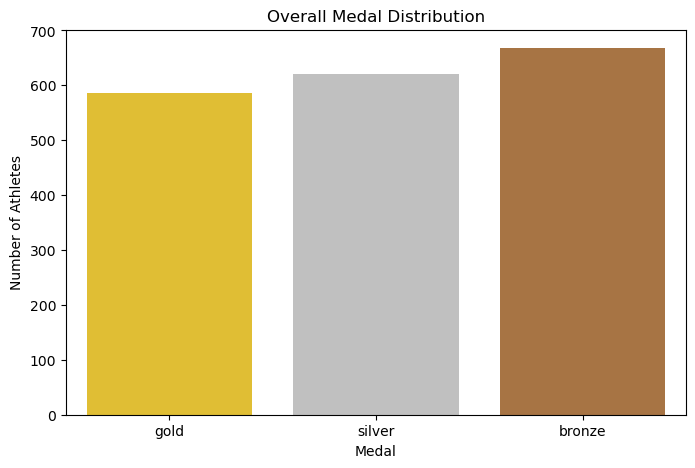

In [253]:
# Create a bar plot of the amount of medalists for each value
plt.figure(figsize = (8, 5))
sns.countplot(df_melted, x = "medal", hue = "medal", palette = ["#FDD017", "#C0C0C0", "#B87333"])

# Add labels
plt.title("Overall Medal Distribution")
plt.xlabel("Medal")
plt.ylabel("Number of Athletes")
plt.show()

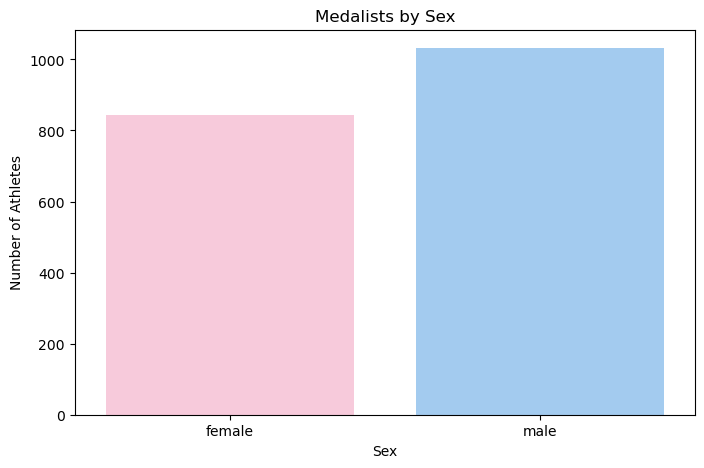

In [254]:
# Create a bar plot comparing male vs female medalists
plt.figure(figsize = (8, 5))
sns.countplot(df_melted, x = "sex", hue = "sex", palette = ["#FFC2D9", "#96CBFC"])

# Add labels
plt.title("Medalists by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Athletes")
plt.show()

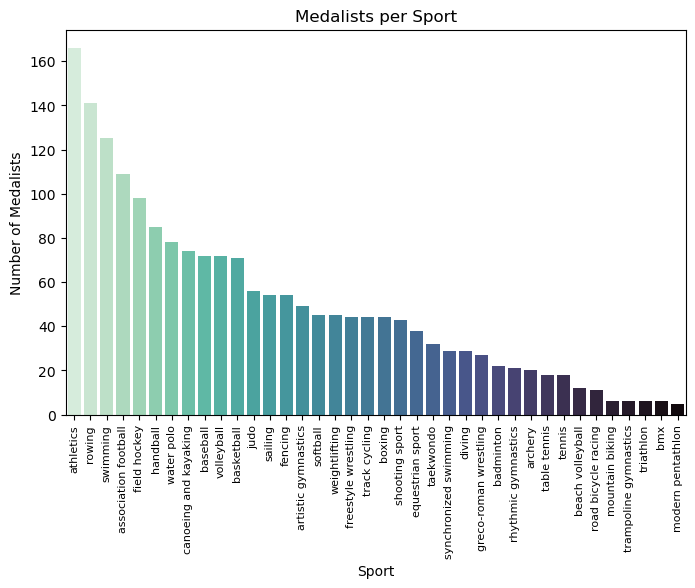

In [257]:
# Create table with total amount of medalists per sport
medalists_per_sport = df_melted["sport"].value_counts().reset_index()

# Plot number of medalists per sport
plt.figure(figsize = (8, 5))
sns.barplot(data = medalists_per_sport,
            x = "sport",
            y = "count",
            hue = "sport",
            palette = "mako_r")

# Add labels
plt.title("Medalists per Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Medalists")
plt.xticks(rotation = 90, fontsize = 8)  
plt.show()

### `pivot_table` Aggregation


`pivot_table` allows the data to be aggregated and counted by the number of medalists in each medal type for each sport.

In [262]:
# Use pivot_table to create aggregated table
df_pivoted = pd.pivot_table(df_melted, values='medalist_name',
                                    index='sport', columns='medal', aggfunc='count', observed = True)

# Display
print("Pivoted Data (First 5 Rows):")
display(df_pivoted.head())

Pivoted Data (First 5 Rows):


medal,gold,silver,bronze
sport,,,
archery,5,7,8
artistic gymnastics,14,16,19
association football,37,36,36
athletics,52,59,55
badminton,7,8,7
